# Standard Imports

In [3]:
#Standard imports
import numpy as np # allows array-based operations linear-algebra etc. with low memory consumption
import pandas as pd # Pandas library is dataframe visualization and manipulation toolkit
np.random.seed(42) # for reproducible randomization of data

#sklearn is a machine-learning library that contains Linear and Non-linear regression models and classifiers
from sklearn.model_selection import train_test_split # Function allows for specified splitting of data into training and test sets
from pprint import pprint 
from sklearn.preprocessing import LabelEncoder #Allows encoding of data classes into (0 - n)categories of data labels
from sklearn.metrics import mean_squared_error, r2_score # R^2 and MSE as assessments of linear regression performancne
from sklearn.metrics import confusion_matrix # Assesses classifier performance
from sklearn.metrics import classification_report # provides class-based precision, f-statistics of the classifier model
from sklearn.metrics import roc_curve #function that calculates the Receiver Operatinng Curve TP vs. 1-FP. 
from sklearn.metrics import roc_auc_score # function provides the integration of the area under the ROC as a measure of diagnostic accuracy

# Keras related imports
import tensorflow as tf #Machine-learning toolkit
import keras #A user-friendly machine-learning toolkit, uses tf as backend
from keras.wrappers.scikit_learn import KerasClassifier #SciKit learn wrapper for Keras Classifier
from keras.wrappers.scikit_learn import KerasRegressor #SciKit learn wrapper for Keras Regression
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters 
from keras.preprocessing.text import Tokenizer
#Now the Graphical libraries imports and settings
import matplotlib.pyplot as plt #Graphing toolkit and backend for correlation plots, scatter plots, histograms etc.
import seaborn as sns # gives me visually appealing graphs based inn matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = '20,10'#baseline size parameter for figures
plt.rcParams['legend.fontsize'] = 16 #baseline fontsize for figures
plt.rcParams['axes.labelsize'] = 16 #baseline axis fontsize for figures
plt.style.use ('ggplot') #emulate ggplot style 

import warnings
warnings.filterwarnings('ignore') #suppress matching warnings

Using TensorFlow backend.


# Exploratory Data Analysis

In [4]:
#importing the breastcancer dataset as a pandas dataframe
df = pd.read_csv("Breastcancer_data.csv") # dataframe imported
df.describe().transpose() #overlook the means, quantiles and standard deviations of data

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
df.shape

(569, 33)

Unfortuantely within our data we have a row of Null values that need to be removed. Unnnamed: 32. 

In [6]:
#"Diagnosis" was removed due to it being a categorical variable
df_subset = df.drop('Unnamed: 32', 1)

In [7]:
# Diagnosis" is transformed from string to integer values for use in models
# Benign and Malignant categories into integer categories 0:1 usingn a dictionary method 
mapping = {'B': 0, 'M':1} 
df_subset = df_subset.replace({'diagnosis': mapping})
df_subset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_subset.shape

(569, 32)

In [9]:
#checking the balance of target variable
df_subset.iloc[:,1].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

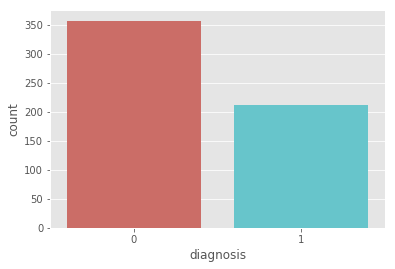

In [10]:
sns.countplot(x=df_subset.iloc[:,1], data=df_subset, palette ='hls')
plt.show()

# Dataset Standardization
Unscaled data can also slow down or even prevent the convergence of many gradient-based estimators. Indeed many estimators are designed with the assumption that each feature takes values close to zero or more importantly that all features vary on comparable scales. The centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

In [11]:
# Robust scaler is used to standardize data and is less effected by outliers, as it operates on the median and unit variance
#importing Robust Scaler function
from sklearn.preprocessing import RobustScaler
#defining predictors and target variables
X, y = df_subset.iloc[:, 2:],df_subset[['diagnosis']].astype("category")
# Instantiate Robust Scaler to standardize predictors, resulting data is a numpy array
Scaler = RobustScaler().fit(X)
X_scaled = Scaler.transform(X)
X_scaled.shape

(569, 30)

In [12]:
X_columns = list(X.columns.values)
type(X_columns)

list

Need to reconvert the numpy.array to pd dataframe to simplify our analysis

In [13]:
#Converting numpy_array to panndas dataframe
df_scaled = pd.DataFrame(data=X_scaled, columns=X_columns)
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


In [14]:
# Joining diagnosis back into dataframe:df_scaled
df_scaled['diagnosis'] = y
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578,1
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500,1
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664,1
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244,1
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099,1


# Variable Selection

## Random Forest for Variable Selection
Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. For classification, it is typically either Gini impurity or information gain/entropy and for regression trees it is variance. Thus when training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. (plagiarized) https://blog.datadive.net/selecting-good-features-part-iii-random-forests/

Advantage: Secondly, when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. As a consequence, they will have a lower reported importance. This is not an issue when we want to use feature selection to reduce overfitting, since it makes sense to remove features that are mostly duplicated by other features

Disadvantage: But when interpreting the data, it can lead to the incorrect conclusion that one of the variables is a strong predictor while the others in the same group are unimportant, while actually they are very close in terms of their relationship with the response variable

In [493]:
# Test-train split
X, y = df_scaled.iloc[:,:-1],df_scaled[['diagnosis']].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

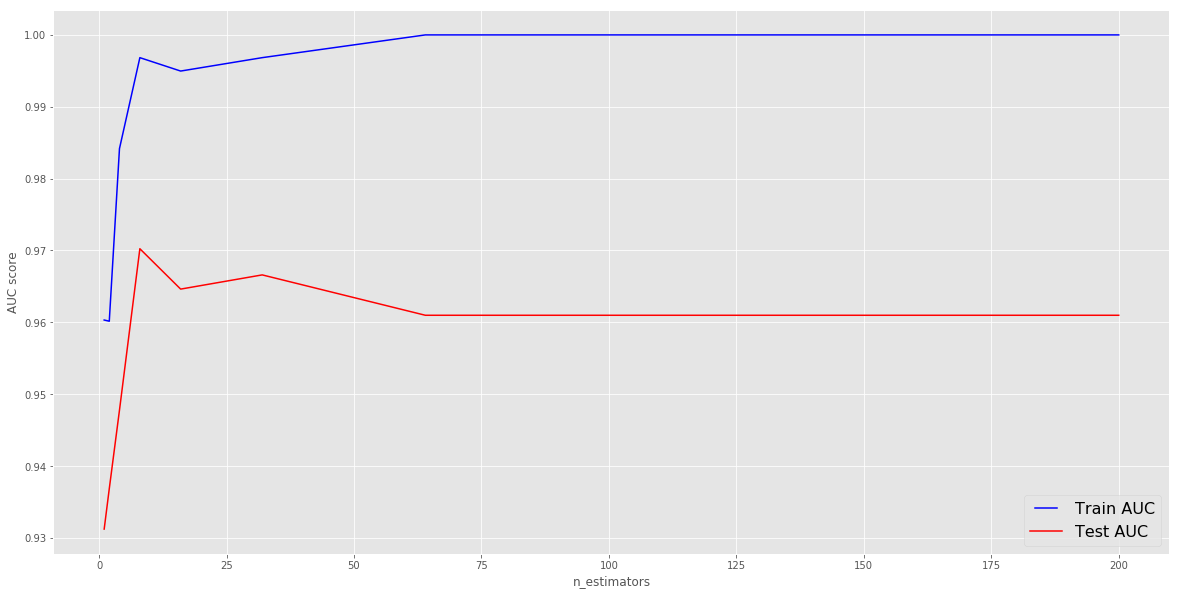

In [494]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
#Determining optimum number of estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


The optimum number of n_estimators or trees would be above 20 for this dataset based on AUC values

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(n_estimators=6000, min_samples_leaf=5)
#Cross-validation will be used to tune the other model parameters

param_dist = {"max_depth": range(1,30,5),
              "max_features": range(1,5,1),
              "bootstrap": [True, False],
              "criterion": ["gini","entropy"]}
#Incorporating cross-validation, with 10 folds, using recall as the primary indicator of model performance. 
rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, cv = 10, scoring='recall')

rf_cv.fit(X_train, y_train)
#97% accuracy achieved with "importance" of predictors
rf_cv.score(X_test, y_test)

ValueError: max_features must be in (0, n_features]

random forest chooses variables by internally testing a single learner on the rest of the data-set
it looks at relative decreases in error-rates of each learning and narrows down the variables that are common to the
lowest error-rates.


## Using Trained Random-Forest Model to Assign Importances

In [496]:
#Storing the RF model of highest recall and training parameters within a variable
best_rf = rf_cv.best_estimator_
best_rf

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=11, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [497]:
#plotting the feature importances
feature_importances = pd.DataFrame(best_rf.feature_importances_ ,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
concave points_worst,0.139100
concave points_mean,0.128745
radius_worst,0.106213
area_worst,0.095537
perimeter_worst,0.090618
area_mean,0.065172
perimeter_mean,0.048928
radius_mean,0.048299
concavity_mean,0.045640
concavity_worst,0.039225


Text(0, 0.5, 'Feature Importance')

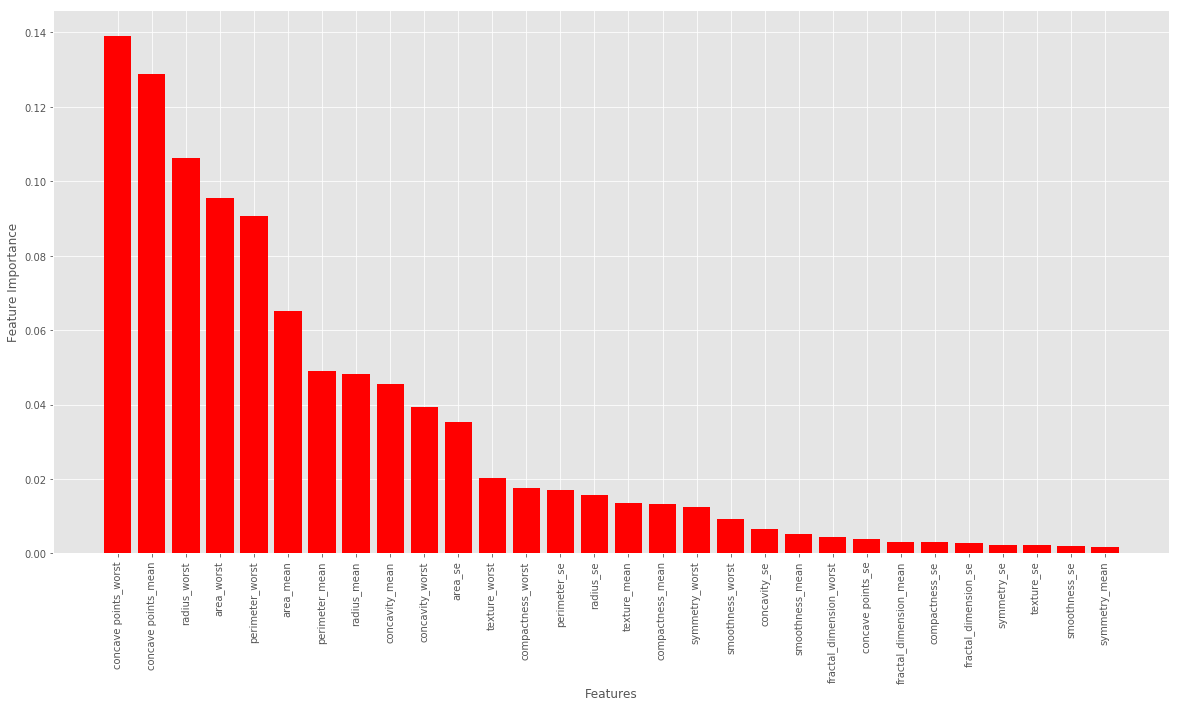

In [498]:
#Plotting the feature importannces
plt.bar(feature_importances.index, feature_importances.importance, color = "red")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")

We see that concave_points, perimeter, area, radius, adnn texture carry most of the importances 
in a recall-based selection. However, we need to account for collinearity in our model. 

## Correlation Matrix

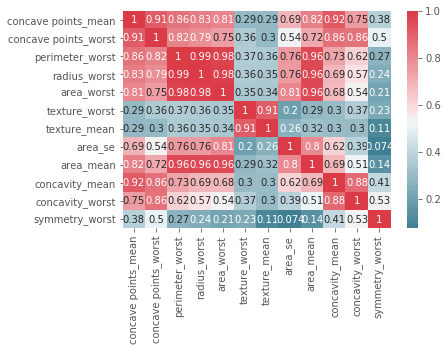

In [15]:
# df for variables of high-importance
data_concat = pd.concat([df_scaled[["concave points_mean",
                                   "concave points_worst",
                                   "perimeter_worst",
                                   "radius_worst",
                                   "area_worst",
                                   "texture_worst",
                                   "texture_mean",
                                   "area_se",
                                   "area_mean",
                                   "concavity_mean",
                                   "concavity_worst",
                                   "symmetry_worst"]], y], axis=1)


cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_concat.corr(), cmap=cmap, annot=True)

Unique variables: symmetry_worst, area_se, texture_worst, concavity_worst

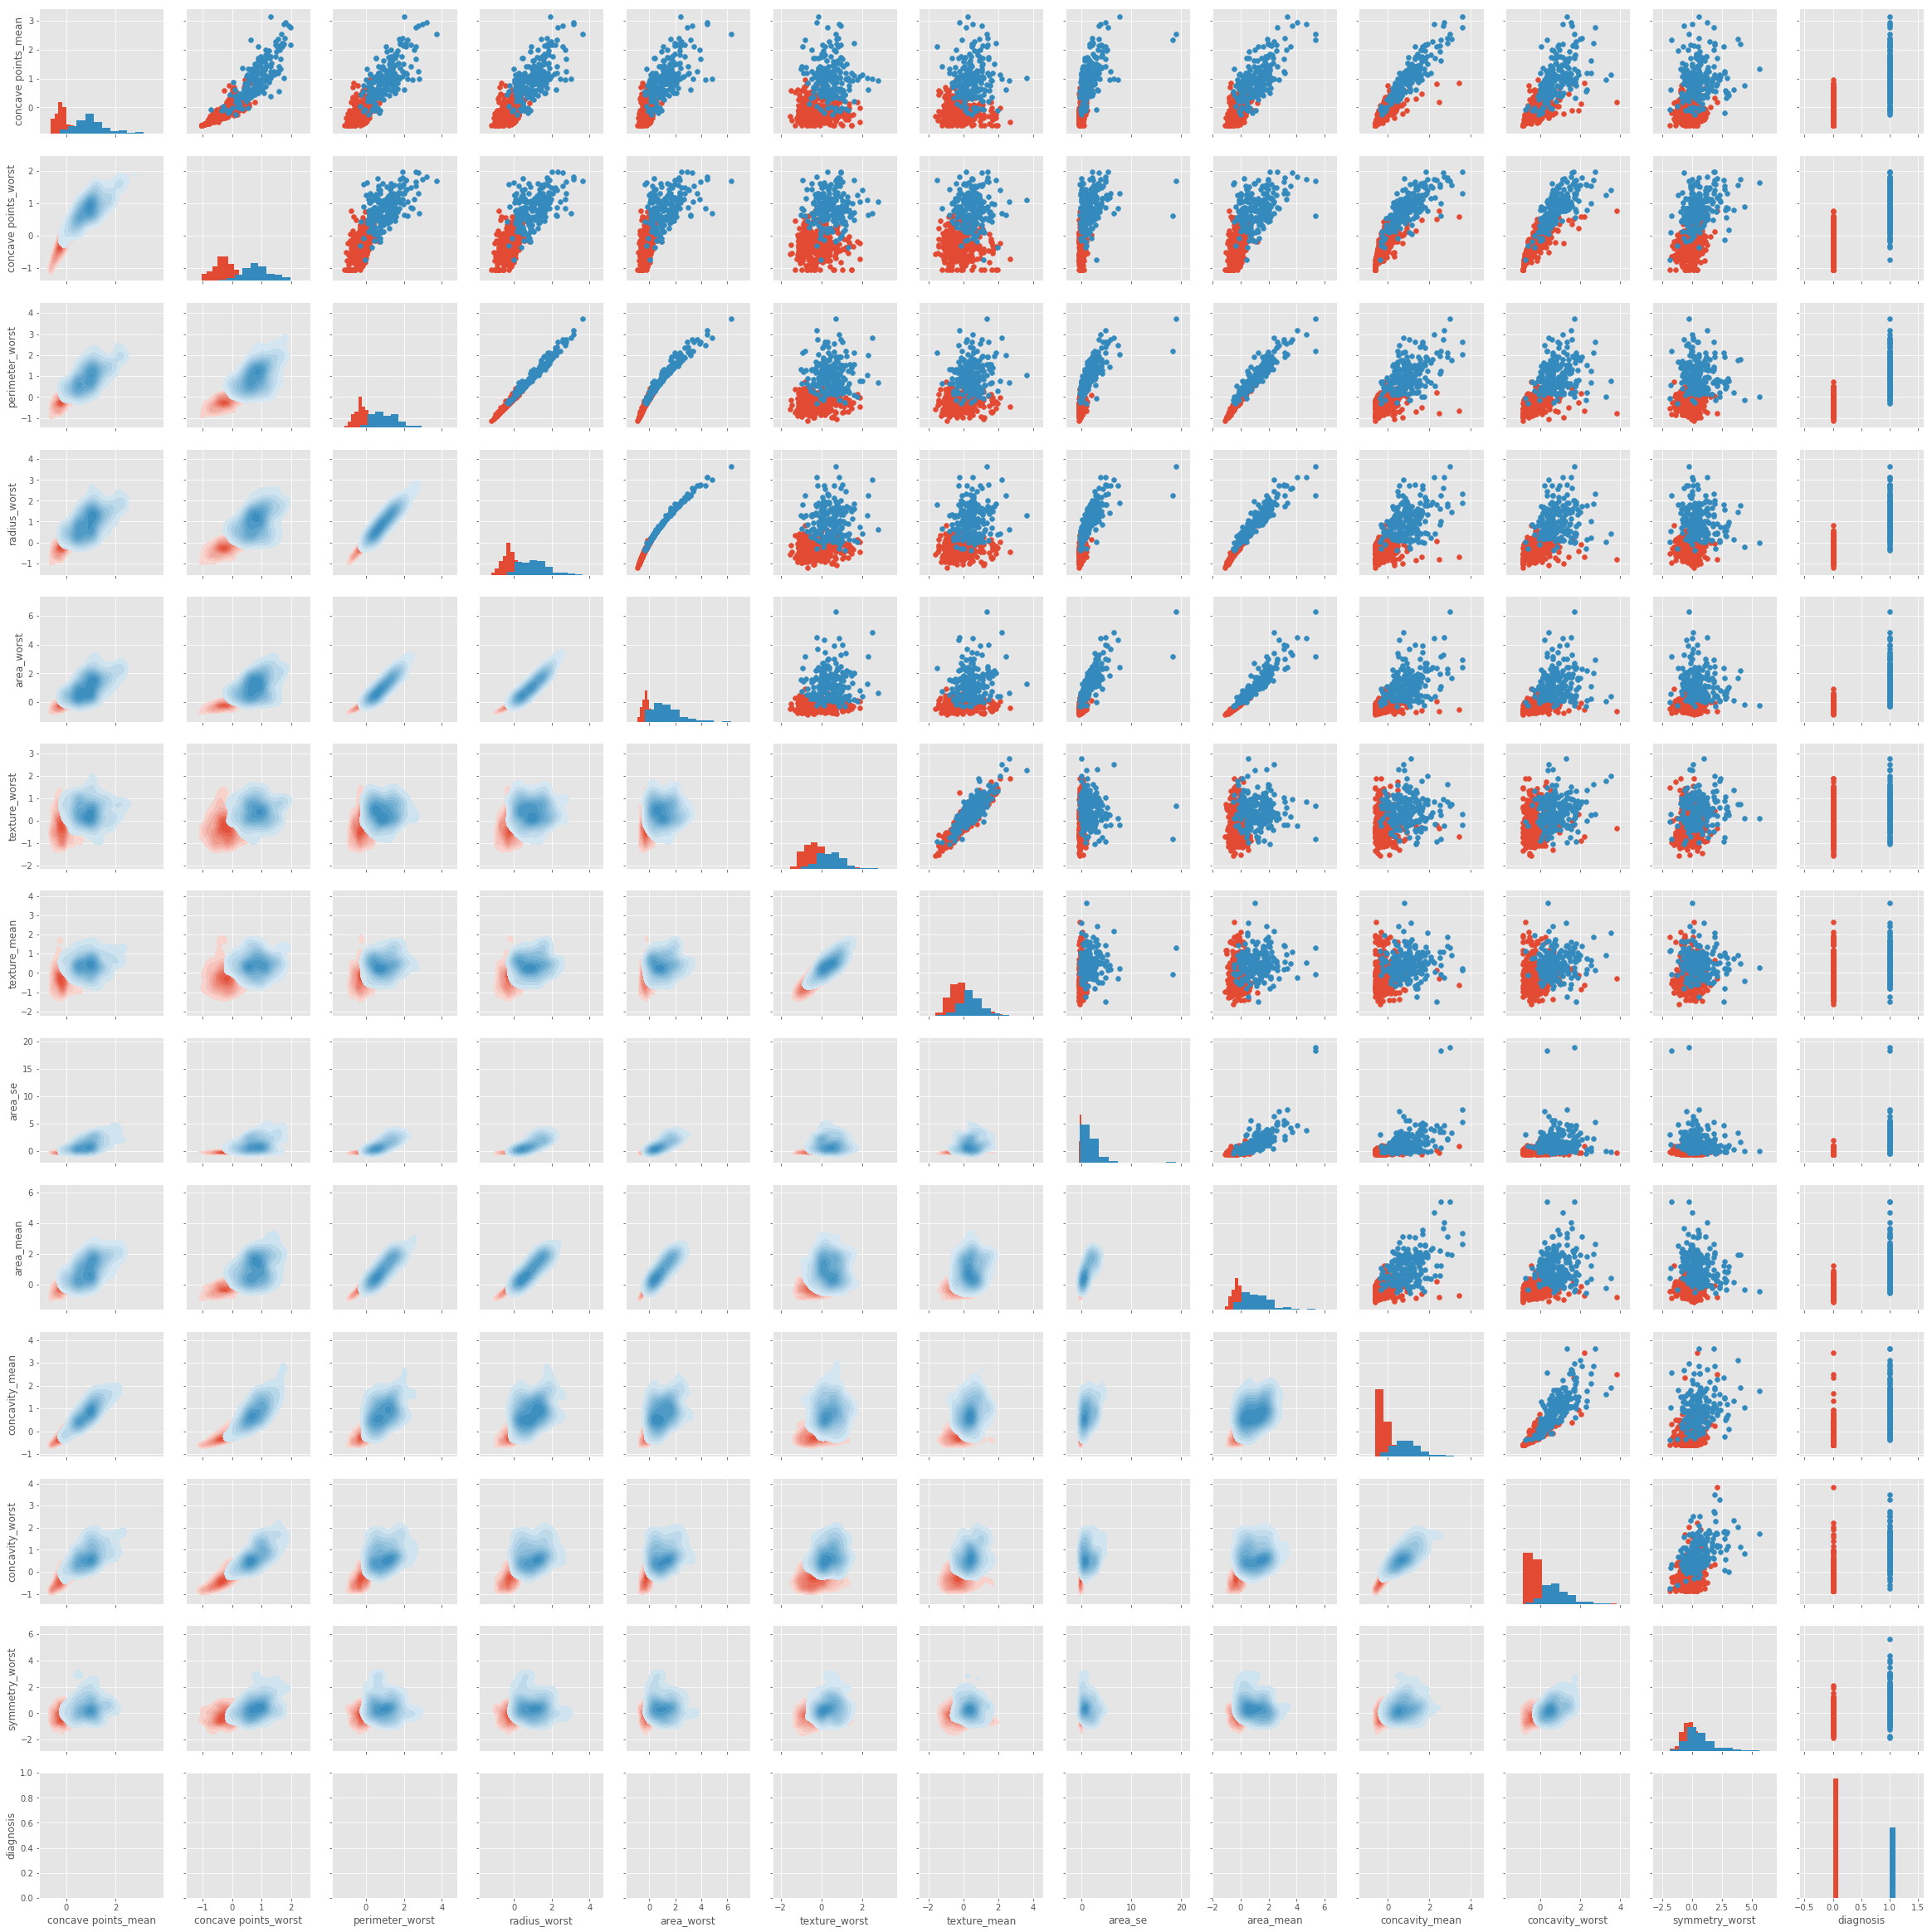

In [220]:
g = sns.PairGrid(data_concat, hue="diagnosis")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
# For the concave-point_mean we see a well demarcated differentiation between the classes- indicated power of predictor

concave points_worst has a good separation betweens means. The other variables are overlapping.

# OneR
OneR analysis is conducted to assist in variable selection as well. It delineates the performance of one predictor as a classifier, and thus subsequent models have to improve over this performance, and if this does not happen it may indicate a poor selection of predictors.

In [230]:
X, y = data_concat[["concave points_mean",
                                   "concave points_worst",
                                   "perimeter_worst",
                                   "radius_worst",
                                   "area_worst",
                                   "texture_worst",
                                   "texture_mean",
                                   "area_se",
                                   "area_mean",
                                   "concavity_mean",
                                   "concavity_worst",
                                   "symmetry_worst"]],\
data_concat["diagnosis"].astype("category")

In [234]:
# for-loop designed to run OneR analysis for variables selected after random forest and correlation matrix.
for column_name in X:
    from sklearn.metrics import confusion_matrix
    from sklearn.linear_model import LogisticRegression
    X1, y = data_concat[[column_name]], data_concat[["diagnosis"]].astype("category")
    X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

    classifier = LogisticRegression(solver="newton-cg")
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    confusion_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"OneR using: {column_name}")
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))

    print("{:15}: {}".format("Classes", classifier.classes_))
    print("{:15}: {}".format("Coefficients", classifier.coef_))
    print("{:15}: {}\n".format("Intercept", classifier.intercept_))

OneR using: concave points_mean
[[80  9]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        89
           1       0.84      0.87      0.85        54

   micro avg       0.89      0.89      0.89       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143

Classes        : [0 1]
Coefficients   : [[4.62756604]]
Intercept      : [-1.83557601]

OneR using: concave points_worst
[[82  7]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        89
           1       0.88      0.91      0.89        54

   micro avg       0.92      0.92      0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

Classes        : [0 1]
Coefficients   : [[4.71225047]]
Intercept      : [-1.60283724]

OneR using: perimeter_worst
[[88  1]
 [ 5 49]]
              precisio

Questions for me: what is the significant of f1 score?, support? understand the confusion matrix. Recall is the metric 
of interest as it represents TP/TP+FN and we would like to minimize the FN in order reduce the chances of a missed
malignancy. The best metrics appear to be "concave points_worst" "perimeter_worst" > "concave points_mean">
"radius_worst", "area_worst". "Symmetry worst" and "texture_mean/worst" appear to have the worst recall. 

# Logistic Regression
The logistic regression model predicts P(Y=1) as a function of X. Generally, this model does not perform better with multicollinearity, thus its important to choose variables of low correlation.

In [239]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.204146
         Iterations 11
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.691      
Dependent Variable:   diagnosis         AIC:               256.3184   
Date:                 2019-03-03 13:07  BIC:               308.4449   
No. Observations:     569               Log-Likelihood:    -116.16    
Df Model:             11                LL-Null:           -375.72    
Df Residuals:         557               LLR p-value:       2.6727e-104
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       11.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
concave points_mean   -2.3962   1.5117 -1.5850 0.1130  -5.3591  0.5668
co

Based on logistic regression of including all of the variables, the p > 0.05 for concave points_mean, perimeter_worst, 
area_worst, texture_worst, texture_mean, area_mean, concavity_mean, concavity_worst, symmetry worst. This leaves us with
concave points_worst, radius_worst, area_se to build our logistic regression model.

In [243]:
#Building our logistic regression model including our all of our RF-selected variables
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) # list of 0's and 1's with threshold 0.5 -> predicted values
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}".format("Intercept", classifier.intercept_))

[[87  2]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[ 1.43040947  1.4032195   0.62724749  1.13329507  1.27245168  1.66858769
   0.3995804   1.78619792  0.46270535 -0.19393829  0.73145139  0.94149985]]
Intercept      : [-2.90197417]


The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
Or in other words its specificity

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

Reference:
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

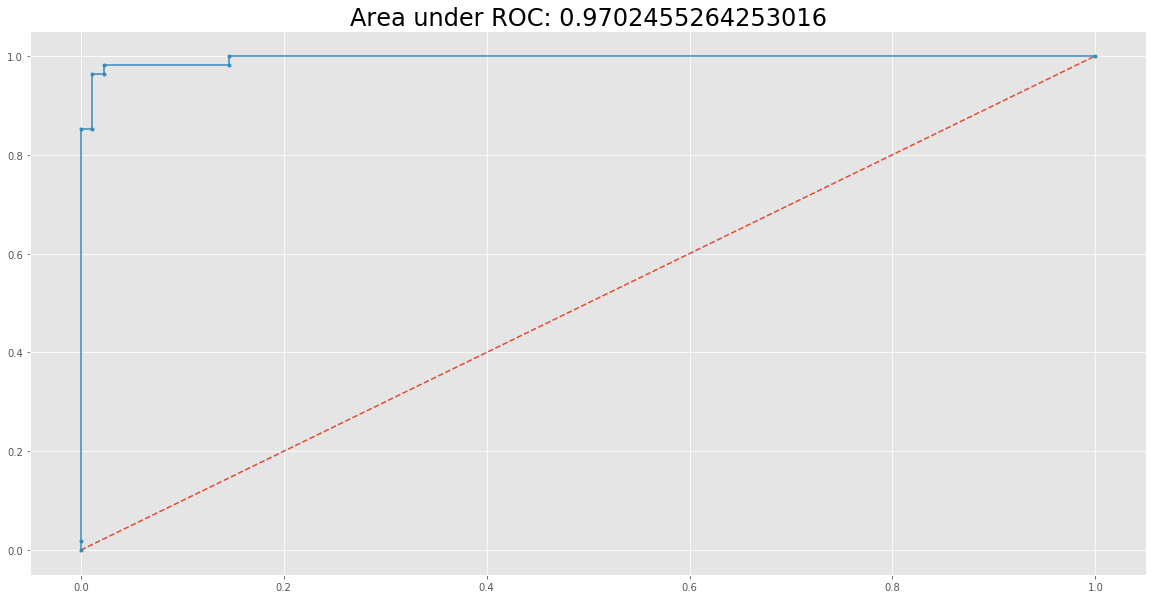

In [273]:
#AUC curve plot
#generates probabilities for each predictor n
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(logit_roc_auc), fontdict={"size":24})
plt.show()

So what does the AUC mean for us?
This means that depending on how we want our model to “behave” we can use different cut-offs.
Do we want 100% true positive rate at the cost of getting some false positives?
Or do we want 0% false positives at the cost of a love true positive rate? For us we want 100% true positives with, no false negatives.

In [328]:
#Building our logistic regression model including p-value significant variables
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
X2, y = data_concat[["concave points_worst",
                     "area_se",
                    "texture_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42)

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) # list of 0's and 1's with threshold 0.5 -> predicted values
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}".format("Intercept", classifier.intercept_))

[[87  2]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[3.86521915 2.51383745 1.70533912]]
Intercept      : [-2.3322746]


Interesting to see, initially running the model with variabels with p<0.05 gave us a recall identical to the model
with all RF selected variables with some worsening of the false-positive rate. However, once "texture_worst" was 
included despite having a p = 0.0105; the model became identical to inclusion of all variables. This may be due to
including a variable that explains some of the variability in the data with the beenfit of have minimial collinearity
with the other variables. "radius_worst" was also dropped with no change in model precision or recall, indicated the
effect of colinearity. This model outperforms any OneR variable indicating that mulitple predictors improve modeling.

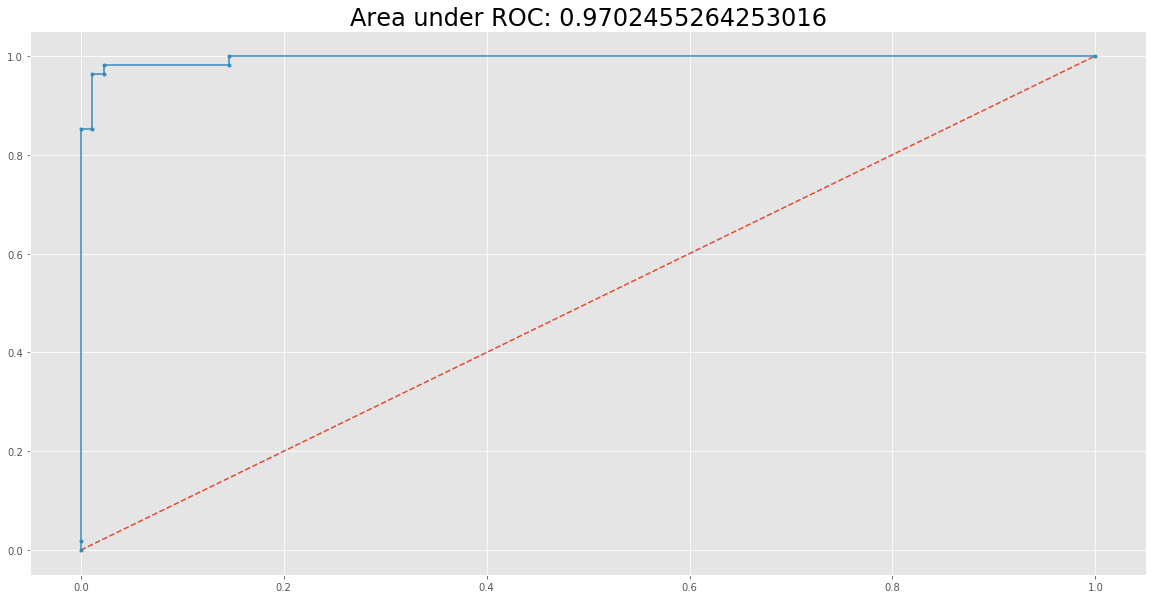

In [274]:
#AUC curve plot
#generates probabilities for each predictor n
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(logit_roc_auc), fontdict={"size":24})
plt.show()

##  Decision Plane

In [ ]:
# Drawing the decision boundary over the points
xx = np.arange(-3,3,0.05)
beta0 = classifier.intercept_
beta1 = classifier.coef_[0][0]
beta2 = classifier.coef_[0][1]
beta3 = classifier.coef_[0][2]

# Decision boundary: beta0 + beta1*x + beta2*y = 0 
line_intercept = -beta0/beta2
line_slope = -beta1/beta2
print("intercept: %s, slope %s" % (line_intercept, line_slope))

# Equation of the line
yy = line_intercept + line_slope*xx

#Draw the scatterplot
figure, axes = plt.subplots(figsize=(20,15,15))
axes.scatter(X.perimeter_worst, X.texture_worst, X.concave points_worst
            s=100, c=y, alpha=0.5)

axes.plot(xx, yy, lw=5, color="red")
axes.annotate('Decision Boundary', xy=(xx[50], yy[50]), xytext=(-0.3,2.5), fontsize=24, color='maroon', fontweight='bold')

axes.set(xlim=(-1.5,3.5), ylim=(-2,3), xlabel='Perimeter worst', ylabel='Texture worst')
axes.legend((y[y=='M'], y[y=='B']),('M','B'), loc='best')



# Linear Discriminant Analysis

In [772]:
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X, y = data_concat[["concave points_mean",
                                   "concave points_worst",
                                   "perimeter_worst",
                                   "radius_worst",
                                   "area_worst",
                                   "texture_worst",
                                   "texture_mean",
                                   "area_se",
                                   "area_mean",
                                   "concavity_mean",
                                   "concavity_worst",
                                   "symmetry_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", lda.classes_))
print("{:15}: {}".format("Coefficients", lda.coef_))
print("{:15}: {}".format("Intercept", lda.intercept_))
print(accuracy_score(y_test, y_pred))

[[88  1]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.93      0.95        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Classes        : [0 1]
Coefficients   : [[ 7.45587233 -0.71181116 -8.9137121  18.98572531 -6.1529692   1.32557744
   0.68196093  0.66518322 -1.52082003 -4.08652133  3.84296     0.74289328]]
Intercept      : [-3.68521889]
0.965034965034965


LDA using the RF selected predictors performed worst than logistic regression. 

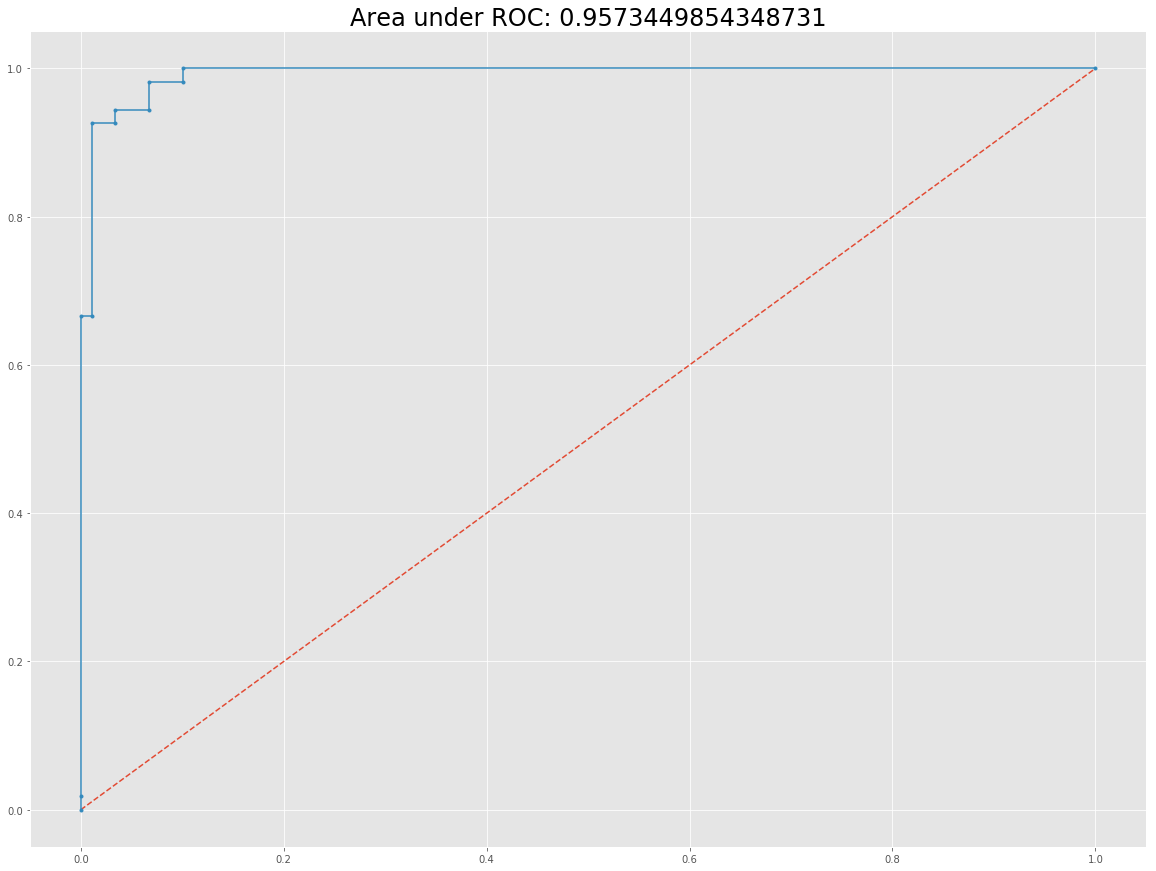

In [773]:
#AUC curve plot
#generates probabilities for each predictor n
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lda_roc_auc = roc_auc_score(y_test, lda.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(lda_roc_auc), fontdict={"size":24})
plt.show()

In [333]:
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X2, y = data_concat[["concave points_worst",
                     "area_se",
                    "texture_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42)


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", lda.classes_))
print("{:15}: {}".format("Coefficients", lda.coef_))
print("{:15}: {}".format("Intercept", lda.intercept_))

[[86  3]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        89
           1       0.94      0.89      0.91        54

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Classes        : [0 1]
Coefficients   : [[5.92049394 0.5693499  1.8043669 ]]
Intercept      : [-2.78014452]


LDA using model-equivalent variables from logistic regression

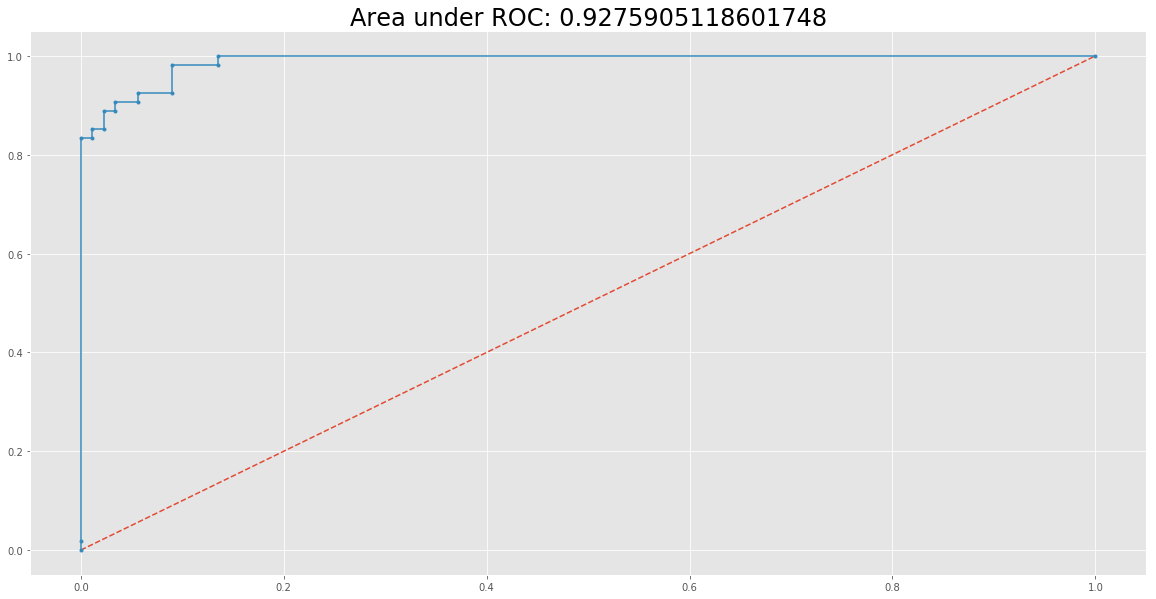

In [334]:
#AUC curve plot
#generates probabilities for each predictor n
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lda_roc_auc = roc_auc_score(y_test, lda.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(lda_roc_auc), fontdict={"size":24})
plt.show()

## Principle Component Analysis on Standardized Variables
The principal components can be understood as new axes of the dataset that maximize the variance along those axes (the eigenvectors of the covariance matrix). In other words, PCA aims to find the axes with maximum variances along which the data is most spread.

In [726]:
X, y = df_scaled.iloc[:,:-1],df_scaled[['diagnosis']].astype("category")
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


In [727]:
# Applying Principal Component Analysis to 30 variables to give us two principal components 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [728]:
# merging target variable to principal component dataset
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,diagnosis
0,8.786469,1.576272,1
1,2.565749,-3.081944,1
2,5.152275,-0.633878,1
3,4.420060,9.262221,1
4,4.282610,-1.317156,1


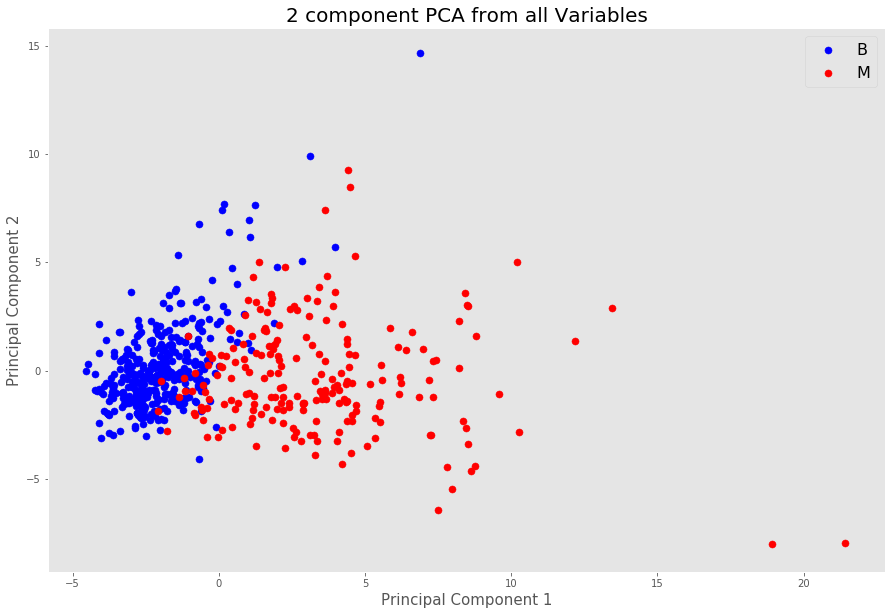

In [729]:
#Visualizing the component separation with target shading
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA from all Variables', fontsize = 20)

finalDf['diagnosis'] = finalDf['diagnosis'].replace({0:"B", 1:"M"})

targets = ["B","M"]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [730]:
#Tell us which components explain what proportion of variation in the data
pca.explained_variance_ratio_

array([0.44942509, 0.19578517])

It appears that principal component 1 explanins 45 percent of the data, whereas principal component 2 explains 20%

## PCA with RF extracted Variables

In [731]:
X, y = data_concat[["concave points_mean",
                                   "concave points_worst",
                                   "perimeter_worst",
                                   "radius_worst",
                                   "area_worst",
                                   "texture_worst",
                                   "texture_mean",
                                   "area_se",
                                   "area_mean",
                                   "concavity_mean",
                                   "concavity_worst",
                                   "symmetry_worst"]],\
data_concat["diagnosis"].astype("category")
X.head()

,concave points_mean,concave points_worst,perimeter_worst,radius_worst,area_worst,texture_worst,texture_mean,area_se,area_mean,concavity_mean,concavity_worst,symmetry_worst
0,2.115850,1.715248,2.105595,1.801038,2.343063,-0.935185,-1.502664,4.713606,1.241446,2.358711,1.807750,2.635556
1,0.682995,0.892194,1.480746,1.733564,2.232284,-0.231481,-0.190053,1.812363,2.138245,0.250742,0.055514,-0.106667
2,1.758242,1.483052,1.328167,1.487889,1.797960,0.013889,0.428064,2.542063,1.798841,1.343287,0.833458,1.171852
3,1.335444,1.633358,0.029305,-0.010381,-0.208897,0.126157,0.273535,0.098756,-0.455298,1.778327,1.714605,5.653333
4,1.318681,0.648595,1.320901,1.309689,1.562335,-1.011574,-0.799290,2.557059,2.058223,1.349219,0.645678,-0.678519


In [732]:
# Applying Principal Component Analysis to 30 variables to give us two principal components 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])

In [733]:
# merging target variable to principal component dataset
finalDf1 = pd.concat([principalDf1, y], axis = 1)
finalDf1.head()

,principal component 1,principal component 2,diagnosis
0,6.045537,-0.453980,1
1,3.020630,0.874533,1
2,4.075768,-0.557357,1
3,0.973306,-5.040495,1
4,3.277656,1.349208,1


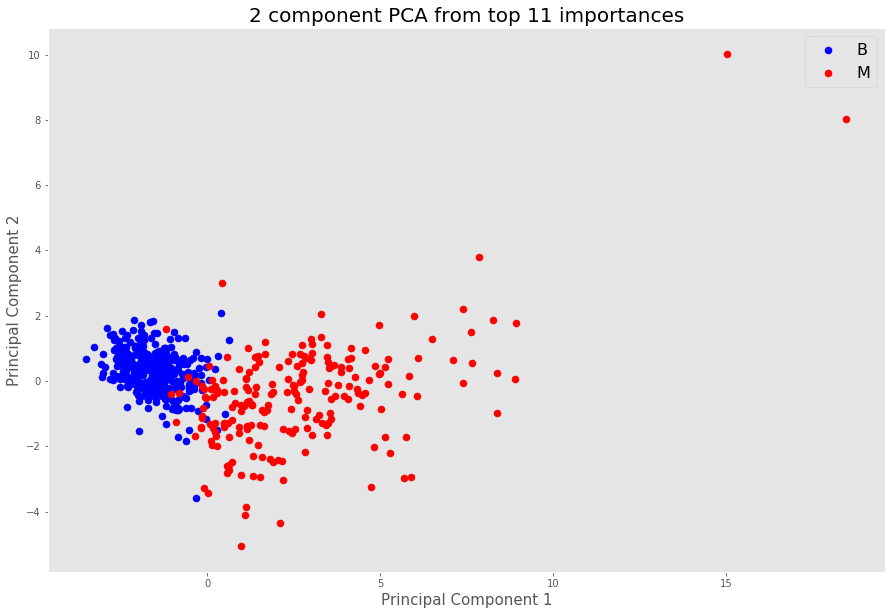

In [734]:
#Visualizing the component separation with target shading
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA from top 11 importances', fontsize = 20)

finalDf1['diagnosis'] = finalDf1['diagnosis'].replace({0:"B", 1:"M"})

targets = ["B","M"]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf1['diagnosis'] == target
    ax.scatter(finalDf1.loc[indicesToKeep, 'principal component 1']
               , finalDf1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [735]:
principalComponents1

array([[ 6.04553666, -0.45397985],
       [ 3.02063026,  0.87453277],
       [ 4.07576813, -0.55735692],
       ...,
       [ 1.12318207,  0.06072424],
       [ 5.68522943, -2.97061909],
       [-2.73390121,  0.24790648]])

In [736]:
explained_variance = np.var(principalComponents1, axis=0)
explained_variance_ratio = explained_variance/np.sum(explained_variance)

explained_variance_ratio

array([0.82980775, 0.17019225])

In [737]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [739]:
pca.explained_variance_ratio_

array([0.66493178, 0.13637645])

## Kernal PCA on Standardized Variables
VC (Vapnik-Chervonenkis) theory tells us that often mappings which take us into a higher dimensional space than the dimension of the input space provide us with greater classification power. In input spaces that are multidimensional, the separation between predictors may be non-linear, thus Kernal PCA can take it to a higher dimenional space to find a linear-boundary of separation. The basic idea to deal with linearly inseparable data is to project it onto a higher dimensional space where it becomes linearly separable

In [129]:
from sklearn.decomposition import PCA, KernelPCA

X, y = data_concat[["concave points_mean",
                                   "concave points_worst",
                                   "perimeter_worst",
                                   "radius_worst",
                                   "area_worst",
                                   "texture_worst",
                                   "texture_mean",
                                   "area_se",
                                   "area_mean",
                                   "concavity_mean",
                                   "concavity_worst",
                                   "symmetry_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,concave points_mean,concave points_worst,perimeter_worst,radius_worst,area_worst,texture_worst,texture_mean,area_se,area_mean,concavity_mean,concavity_worst,symmetry_worst
0,2.115850,1.715248,2.105595,1.801038,2.343063,-0.935185,-1.502664,4.713606,1.241446,2.358711,1.807750,2.635556
1,0.682995,0.892194,1.480746,1.733564,2.232284,-0.231481,-0.190053,1.812363,2.138245,0.250742,0.055514,-0.106667
2,1.758242,1.483052,1.328167,1.487889,1.797960,0.013889,0.428064,2.542063,1.798841,1.343287,0.833458,1.171852
3,1.335444,1.633358,0.029305,-0.010381,-0.208897,0.126157,0.273535,0.098756,-0.455298,1.778327,1.714605,5.653333
4,1.318681,0.648595,1.320901,1.309689,1.562335,-1.011574,-0.799290,2.557059,2.058223,1.349219,0.645678,-0.678519


### 2 Principal Components

In [130]:
# Question how did we decide which kernel to use?
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=2)

X_pca_2 = pca.fit_transform(X_back)
X_pca_2Df = pd.DataFrame(data = X_pca_2
             , columns = ['principal component 1', 'principal component 2'])

In [131]:
X_pca_mergedDf = pd.concat([X_pca_2Df, y], axis = 1)
X_pca_mergedDf.head()

,principal component 1,principal component 2,diagnosis
0,3.022768,-0.226990,1
1,1.510315,0.437266,1
2,2.037884,-0.278678,1
3,0.486653,-2.520247,1
4,1.638828,0.674604,1


In [81]:
# Kernal PCA variance ratios for principal components
explained_variance = np.var(X_pca_2, axis=0)
explained_variance_ratio = explained_variance/np.sum(explained_variance)

explained_variance_ratio

array([0.82980777, 0.17019223])

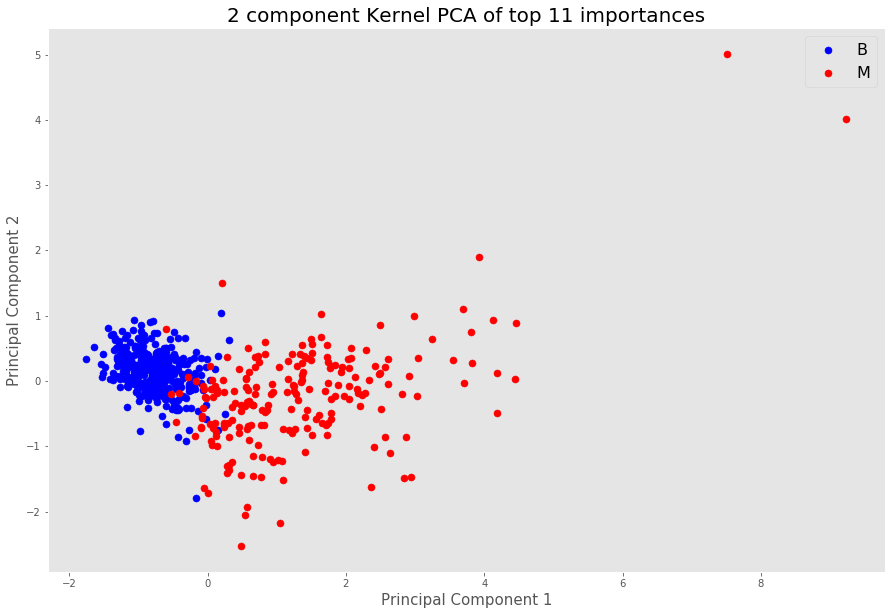

In [82]:
#Visualizing the component separation with target shading
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Kernel PCA of top 11 importances', fontsize = 20)

X_pca_mergedDf['diagnosis'] = X_pca_mergedDf['diagnosis'].replace({0:"B", 1:"M"})

targets = ["B","M"]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = X_pca_mergedDf['diagnosis'] == target
    ax.scatter(X_pca_mergedDf.loc[indicesToKeep, 'principal component 1']
               , X_pca_mergedDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 3 Principal Components

In [132]:
# Question how did we decide which kernel to use?
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=3)

X_pca_3 = pca.fit_transform(X_back)
X_pca_3Df = pd.DataFrame(data = X_pca_3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [133]:
X_pca_merged3Df = pd.concat([X_pca_3Df, y], axis = 1)
X_pca_merged3Df.head()

,principal component 1,principal component 2,principal component 3,diagnosis
0,3.022768,-0.226990,-1.681502,1
1,1.510315,0.437266,-0.155747,1
2,2.037884,-0.278678,-0.310263,1
3,0.486653,-2.520247,-1.064579,1
4,1.638828,0.674604,-0.700637,1


<function matplotlib.pyplot.show(*args, **kw)>

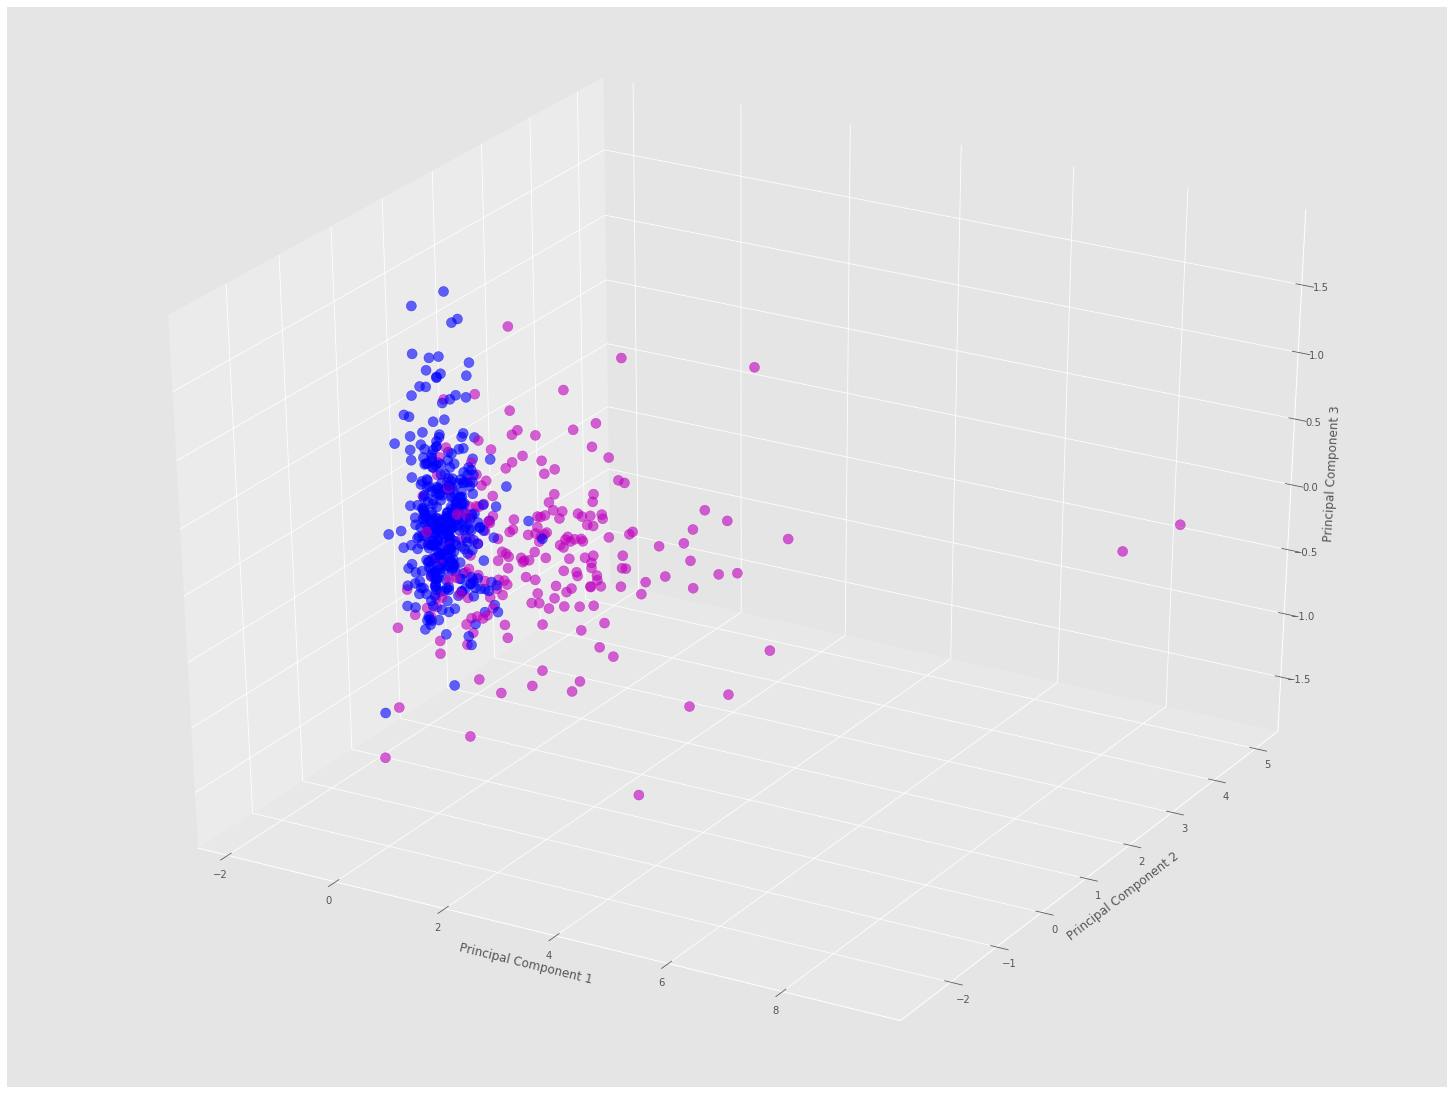

In [85]:
# Plotting the three principal components
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "20,15"

y = y.replace({0:"B", 1:"M"})

fig = plt.figure()
axis = Axes3D(fig)

axis.scatter(X_pca_3Df.iloc[:,0],
             X_pca_3Df.iloc[:,1],
             X_pca_3Df.iloc[:,2], c = y, s = 100, alpha=0.6)

axis.set_xlabel("Principal Component 1")
axis.set_ylabel("Principal Component 2")
axis.set_zlabel("Principal Component 3")
plt.show

## Scree Plot of Optimal Number of Principal Components

In [86]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_back)

principal_X_pca = pd.DataFrame(data=X_pca)

In [87]:
X_pca

array([[ 3.02276839e+00, -2.26989762e-01, -1.68150208e+00, ...,
         1.38899640e-01, -2.96081454e-01, -1.58096626e-01],
       [ 1.51031528e+00,  4.37266408e-01, -1.55747214e-01, ...,
        -7.52665130e-02,  6.11336050e-02,  1.22474332e-01],
       [ 2.03788420e+00, -2.78678406e-01, -3.10262762e-01, ...,
        -1.40993283e-01,  2.93670187e-03,  8.88926908e-02],
       ...,
       [ 5.61591235e-01,  3.03620530e-02,  9.53552469e-01, ...,
        -1.81101760e-01,  2.22089952e-02, -1.55954535e-02],
       [ 2.84261493e+00, -1.48530950e+00,  3.18407719e-01, ...,
         5.86398280e-02, -7.87528127e-02, -1.33966033e-01],
       [-1.36695094e+00,  1.23953161e-01,  7.19774475e-01, ...,
         1.29183683e-02, -1.12082959e-01,  6.25506011e-02]])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

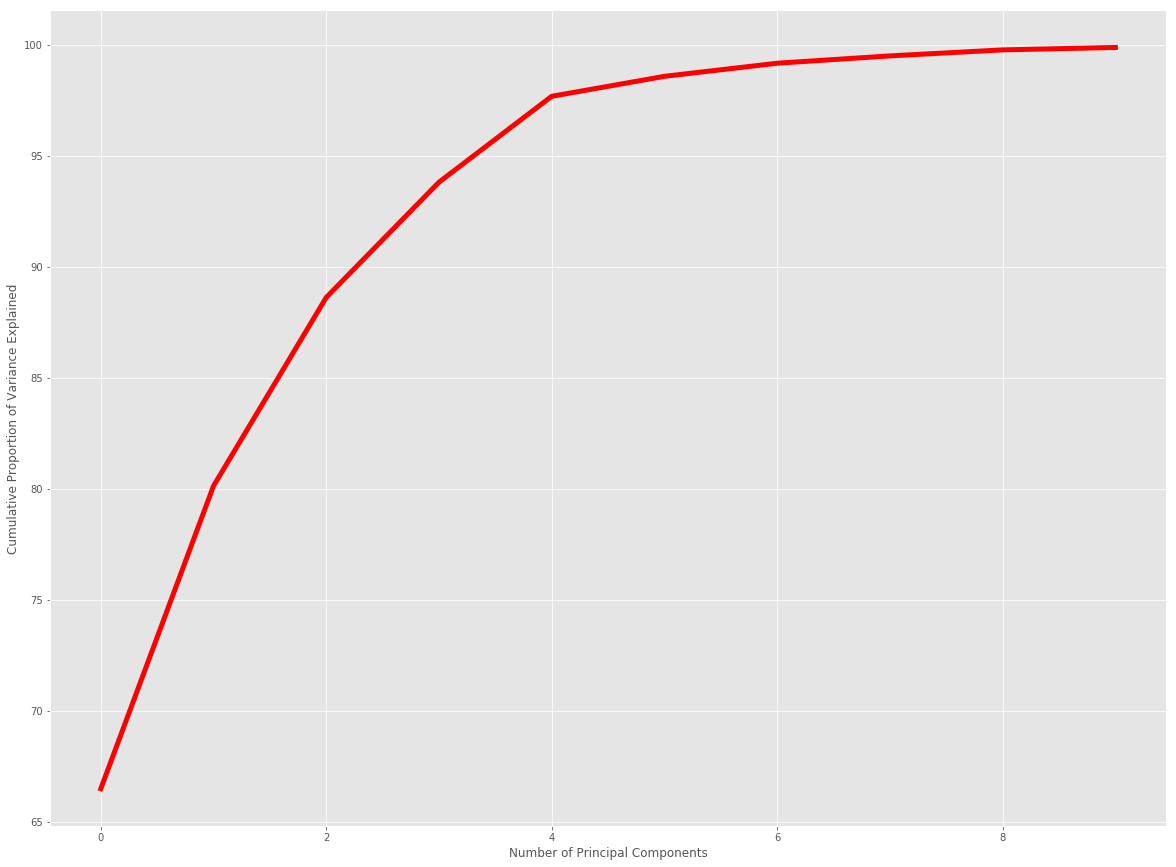

In [88]:
#Plotting the PCA components against explained variation -> figure out how to do this in seaborn
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.rcParams["figure.figsize"] = "20,15"
plt.plot(var1, linewidth=5, c = "red")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")

In [89]:
data_mean = pd.DataFrame.mean(data_concat.iloc[:,0:12])
type(data_mean)

pandas.core.series.Series

In [92]:
data_concat.columns.values

array(['concave points_mean', 'concave points_worst', 'perimeter_worst',
       'radius_worst', 'area_worst', 'texture_worst', 'texture_mean',
       'area_se', 'area_mean', 'concavity_mean', 'concavity_worst',
       'symmetry_worst', 'diagnosis'], dtype=object)

In [91]:
significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

NameError: name 'eigenval' is not defined

## Applying PCA to Logistic Regression

In [570]:
## It appears like 4 principal components are the sweet spot lets use them for the Logistic regression
# extract components
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=4)

X_pca_4 = pca.fit_transform(X_back)
X_pca_4Df = pd.DataFrame(data = X_pca_4
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [571]:
X_pca_4Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,3.022768,-0.226990,-1.681502,0.644403
1,1.510315,0.437266,-0.155747,-0.763340
2,2.037884,-0.278678,-0.310263,-0.040886
3,0.486653,-2.520247,-1.064579,1.295465
4,1.638828,0.674604,-0.700637,-0.499019


In [572]:
# join with diagnosis variable
X_pca_merged4Df = pd.concat([X_pca_4Df, y], axis = 1)
X_pca_merged4Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,diagnosis
0,3.022768,-0.226990,-1.681502,0.644403,1
1,1.510315,0.437266,-0.155747,-0.763340,1
2,2.037884,-0.278678,-0.310263,-0.040886,1
3,0.486653,-2.520247,-1.064579,1.295465,1
4,1.638828,0.674604,-0.700637,-0.499019,1


In [573]:
# Test_train split
X, y = X_pca_merged4Df[['principal component 1',
                        'principal component 2',
                        'principal component 3',
                        'principal component 4']],\
X_pca_merged4Df["diagnosis"].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,3.022768,-0.226990,-1.681502,0.644403
1,1.510315,0.437266,-0.155747,-0.763340
2,2.037884,-0.278678,-0.310263,-0.040886
3,0.486653,-2.520247,-1.064579,1.295465
4,1.638828,0.674604,-0.700637,-0.499019


In [574]:
#applying the components to logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.089141
         Iterations 10
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.865      
Dependent Variable:  diagnosis         AIC:               109.4428   
Date:                2019-03-08 12:33  BIC:               126.8184   
No. Observations:    569               Log-Likelihood:    -50.721    
Df Model:            3                 LL-Null:           -375.72    
Df Residuals:        565               LLR p-value:       1.4587e-140
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      10.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
principal component 1  7.8692   1.0044  7.8345 0.0000  5.9006  9.8379
principal compo

In [575]:
#Building our logistic regression model with four PCA components
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) # list of 0's and 1's with threshold 0.5 -> predicted values
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}".format("Intercept", classifier.intercept_))

[[86  3]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        89
           1       0.95      0.96      0.95        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[ 4.58878663 -1.589044    0.97508526  0.15829575]]
Intercept      : [-0.3153468]


In [576]:
## 3-component with Logistic Regression (removing the fourth component due to insignificance of P-value)
X, y = X_pca_merged4Df[['principal component 1',
                        'principal component 2',
                        'principal component 3',]],\
X_pca_merged4Df["diagnosis"].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,principal component 1,principal component 2,principal component 3
0,3.022768,-0.226990,-1.681502
1,1.510315,0.437266,-0.155747
2,2.037884,-0.278678,-0.310263
3,0.486653,-2.520247,-1.064579
4,1.638828,0.674604,-0.700637


In [577]:
#applying the components to logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.089247
         Iterations 10
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.865      
Dependent Variable:  diagnosis         AIC:               107.5627   
Date:                2019-03-08 12:36  BIC:               120.5943   
No. Observations:    569               Log-Likelihood:    -50.781    
Df Model:            2                 LL-Null:           -375.72    
Df Residuals:        566               LLR p-value:       7.6022e-142
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      10.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
principal component 1  7.8405   0.9922  7.9018 0.0000  5.8957  9.7852
principal compo

In [764]:
#Building our logistic regression model with the significant PCA components
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) # list of 0's and 1's with threshold 0.5 -> predicted values
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}".format("Intercept", classifier.intercept_))

[[88  1]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Classes        : [0 1]
Coefficients   : [[ 6.06716238 -2.15465269  0.79933831]]
Intercept      : [-0.56922038]


It looks like the sweet spot is actaully 3 principal components, despite what the Scree plot shows.
However, Kernel PCA failed to improve on Logistic Regression of RF selected variables, specificity and precision
being superior on the 11 RF-selected variables.

## Applying Kernel PCA in a way that generates a total of 3-components

In [134]:
## 3-component analysis, if the Kernel PCA was asked to generate only 3-components total
X, y = X_pca_merged3Df[['principal component 1',
                        'principal component 2',
                        'principal component 3',]],\
X_pca_merged3Df["diagnosis"].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,principal component 1,principal component 2,principal component 3
0,3.022768,-0.226990,-1.681502
1,1.510315,0.437266,-0.155747
2,2.037884,-0.278678,-0.310263
3,0.486653,-2.520247,-1.064579
4,1.638828,0.674604,-0.700637


In [75]:
#applying the components to logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.204146
         Iterations 11
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.691      
Dependent Variable:   diagnosis         AIC:               256.3184   
Date:                 2019-03-10 15:02  BIC:               308.4449   
No. Observations:     569               Log-Likelihood:    -116.16    
Df Model:             11                LL-Null:           -375.72    
Df Residuals:         557               LLR p-value:       2.6727e-104
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       11.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
concave points_mean   -2.3962   1.5117 -1.5850 0.1130  -5.3591  0.5668
co

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) # list of 0's and 1's with threshold 0.5 -> predicted values
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}".format("Intercept", classifier.intercept_))
print(accuracy_score(y_test, y_pred))

[[87  2]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[ 1.43040947  1.4032195   0.62724749  1.13329507  1.27245168  1.66858769
   0.3995804   1.78619792  0.46270535 -0.19393829  0.73145139  0.94149985]]
Intercept      : [-2.90197417]
0.972027972027972


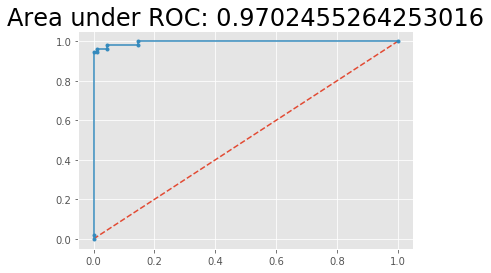

In [77]:
#AUC curve plot
#generates probabilities for each predictor n
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(logit_roc_auc), fontdict={"size":24})
plt.show()

There is an improvemennt in the model's sensitivity and specificty over three components, however it seems like the third principal component is slightly insignificant  p = 0.0138. This has similar overall performance to LDA, however the recall is superior, making this test viable in reducing false negative rates.

## Decision boundary for 3-component PCA applied to Logistic Regression

In [ ]:
# Code the decision boundary

## Kernel PCA with 2-components generated from algorithm

In [740]:
## 2-component analysis, if the Kernel PCA was asked to generate only 2-components total
X, y = X_pca_mergedDf[['principal component 1',
                        'principal component 2']],\
X_pca_mergedDf["diagnosis"].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,principal component 1,principal component 2
0,3.022768,-0.226990
1,1.510315,0.437266
2,2.037884,-0.278678
3,0.486653,-2.520247
4,1.638828,0.674604


In [744]:
y = y.replace({"B":0, "M":1})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [745]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.098126
         Iterations 10
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.851      
Dependent Variable:  diagnosis         AIC:               115.6670   
Date:                2019-03-09 18:41  BIC:               124.3548   
No. Observations:    569               Log-Likelihood:    -55.834    
Df Model:            1                 LL-Null:           -375.72    
Df Residuals:        567               LLR p-value:       3.7438e-141
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      10.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
principal component 1  7.2832   0.9009  8.0843 0.0000  5.5174  9.0489
principal compo

In [746]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) # list of 0's and 1's with threshold 0.5 -> predicted values
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}".format("Intercept", classifier.intercept_))
print(accuracy_score(y_test,y_pred))

[[87  2]
 [ 2 52]]
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        89
           M       0.96      0.96      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : ['B' 'M']
Coefficients   : [[ 4.48423609 -1.48290661]]
Intercept      : [-0.23840638]
0.972027972027972


Based on this data, it looks the best performance achievable is with 3-principal components. 
As specificity and precision have worsened

# Native-Bayes Classifier
Naive Bayes classifier calculates the probabilities for every factor. Then it selects the outcome with highest probability.

It tells us how often A happens given that B happens, written P(A|B), when we know how often B happens given that A happens, written P(B|A) , and how likely A and B are on their own.
P(A|B) is “Probability of A given B”, the probability of A given that B happens
P(A) is Probability of A
P(B|A) is “Probability of B given A”, the probability of B given that A happens
P(B) is Probability of B


This classifier assumes the features (in this case we had words as input) are independent. Hence the word naive. Even with this it is powerful algorithm used for: Real time Prediction, Text classification/ Spam Filtering, Recommendation System

We first calculate P(x1| E) , P(x2 | E) … [read as probability of x1 given event E happened] and then select the test actor x with maximum probability value.

Source:https://medium.com/machine-learning-101/chapter-1-supervised-learning-and-naive-bayes-classification-part-1-theory-8b9e361897d5

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
X, y = data_concat[["concave points_worst",
                     "area_se",
                    "texture_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,concave points_worst,area_se,texture_worst
0,1.715248,4.713606,-0.935185
1,0.892194,1.812363,-0.231481
2,1.483052,2.542063,0.013889
3,1.633358,0.098756,0.126157
4,0.648595,2.557059,-1.011574


In [44]:
#instantiating Native Bayes as a Gaussian model
NBModel = GaussianNB()
# Fitting the model
NBModel.fit(X_train, y_train)
NBModel.score(X_train,  y_train)

0.9530516431924883

In [45]:
#Prediction values
Nb_predictions = NBModel.predict(X_test)

print(confusion_matrix(y_test,Nb_predictions))  
print(classification_report(y_test,Nb_predictions))
print(accuracy_score(y_test,Nb_predictions))

[[86  3]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        89
           1       0.95      0.96      0.95        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

0.965034965034965


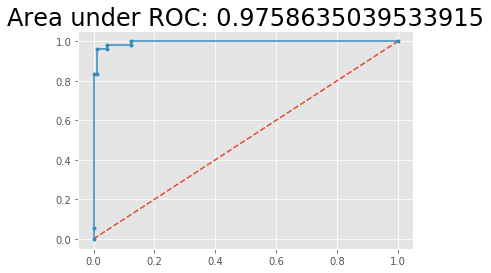

In [46]:
## ROC curve with AUC
#AUC curve plot
#generates probabilities for each predictor n
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, sv_pred)
fpr, tpr, thresholds = roc_curve(y_test, svmodel.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(NB_roc_auc), fontdict={"size":24})
plt.show()

# Support Vector Machines

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line). 1. Identify the right hyperplane which first has the ability to accurately classify all targets, and then has the largest margin (distance from hyperplane and classes of points). Like PCA, you can apply a Kernel Trick so transform data to higher dimensions when boundaries are non-linear.

In [35]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X, y = data_concat[["concave points_worst",
                     "area_se",
                    "texture_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,concave points_worst,area_se,texture_worst
0,1.715248,4.713606,-0.935185
1,0.892194,1.812363,-0.231481
2,1.483052,2.542063,0.013889
3,1.633358,0.098756,0.126157
4,0.648595,2.557059,-1.011574


In [36]:
# Create SVM classification object 
## there is various option associated with it, like changing kernel, gamma and C value. 
## Will discuss more about it in next section.Train the model using the training sets and check score
svmodel = svm.SVC(kernel='rbf', gamma=0.01, C=1000, probability=True) 
svmodel.fit(X_train, y_train)
svmodel.score(X_train, y_train)
#Predict Output
sv_pred = svmodel.predict(X_test)

print(confusion_matrix(y_test,sv_pred))  
print(classification_report(y_test,sv_pred))
print(accuracy_score(y_test,sv_pred))

[[88  1]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791


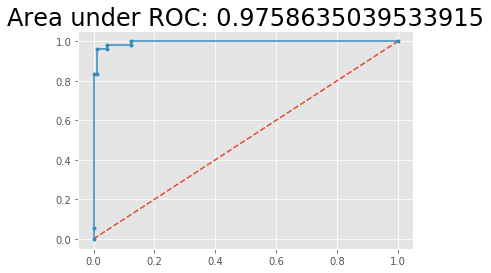

In [37]:
## ROC curve with AUC
#AUC curve plot
#generates probabilities for each predictor n
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sv_roc_auc = roc_auc_score(y_test, sv_pred)
fpr, tpr, thresholds = roc_curve(y_test, svmodel.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(sv_roc_auc), fontdict={"size":24})
plt.show()

SVM improves performance significantly over the other models, with the highest recall and precision thus far. 
If cross-validation is divided into C=1000 samples, the accuracy becomes perfect with 100% precision andn 100% recall. 

## Accuracies comparing various kernels, cross-validation levels, and gamma values: Kernel vs Accuracy Plots

# Gradient Boosting

The reason we use ensembles is that many different predictors trying to predict same target variable will 
perform a better job than any single predictor alone. Ensembling techniques are further classified into 
Bagging and Boosting. agging is a simple ensembling technique in which we build many independent predictors/models/learners
and combine them using some model averaging techniques. (e.g. weighted average, majority vote or normal average).
Boosting is an ensemble technique in which the predictors are not made independently, but sequentially. https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. (Wikipedia definition).

In summary, 
• We first model data with simple models and analyze data for errors. 
• These errors signify data points that are difficult to fit by a simple model. 
• Then for later models, we particularly focus on those hard to fit data to get them right. 
• In the end, we combine all the predictors by giving some weights to each predictor.

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

X, y = data_concat[["concave points_worst",
                     "area_se",
                    "texture_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,concave points_worst,area_se,texture_worst
0,1.715248,4.713606,-0.935185
1,0.892194,1.812363,-0.231481
2,1.483052,2.542063,0.013889
3,1.633358,0.098756,0.126157
4,0.648595,2.557059,-1.011574


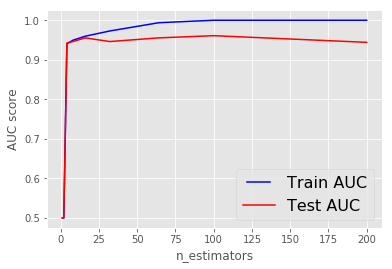

In [112]:
#Finding the optimum number of estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   GB = GradientBoostingClassifier(n_estimators=estimator)
   GB.fit(X_train, y_train)
   train_pred = GB.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = GB.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()



### learning-rate
learning rate shrinks the contribution of each tree by learning_rate.

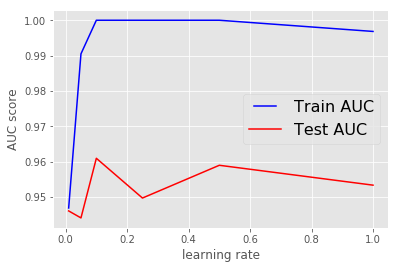

In [113]:
# Determining optimum learning-rate.
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for learn in learning_rates:
   GB = GradientBoostingClassifier(learning_rate=learn)
   GB.fit(X_train, y_train)
   train_pred = GB.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = GB.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

### max_depth
max_depth. This indicates how deep the built tree can be. 
The deeper the tree, the more splits it has and it captures more information about how the data.
We fit a decision tree with depths ranging from 1 to 32 and plot the training and test errors

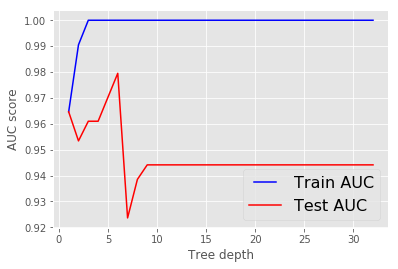

In [114]:
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   GB = GradientBoostingClassifier(max_depth=max_depth)
   GB.fit(X_train, y_train)
   train_pred = GB.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = GB.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

## min_samples_split
min_samples_split represents the minimum number of samples required to split an internal node. 
This can vary between considering at least one sample at each node to considering all of the samples at each node.
When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.
Here we will vary the parameter from 10% to 100% of the samples

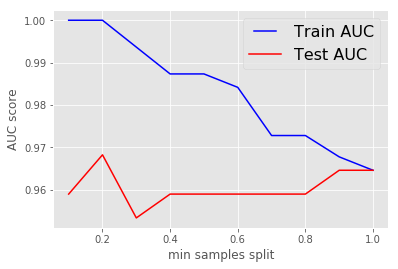

In [115]:
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   GB = GradientBoostingClassifier(min_samples_split=min_samples_split)
   GB.fit(X_train, y_train)
   train_pred = GB.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = GB.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

## min_samples_leaf
min_samples_leaf is The minimum number of samples required to be at a leaf node.
This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.

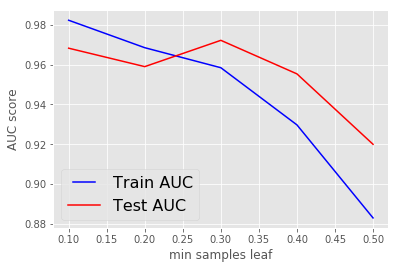

In [116]:
#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   GB = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   GB.fit(X_train, y_train)
   train_pred = GB.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = GB.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

## max_features
max_features represents the number of features to consider when looking for the best split.

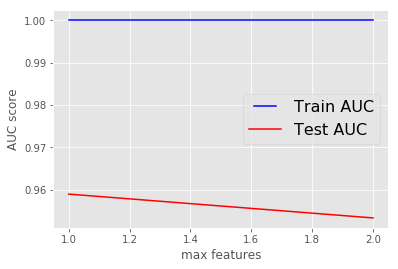

In [117]:
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
max_features = list(range(1,3))
train_results = []
test_results = []
for max_feature in max_features:
   GB = GradientBoostingClassifier(max_features=max_feature)
   GB.fit(X_train, y_train)
   train_pred = GB.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = GB.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [118]:
# Creating model object
GBBoost = GradientBoostingClassifier(loss ='exponential', 
                                     learning_rate=0.1, 
                                     n_estimators=1000, 
                                     subsample=1.0,  
                                     criterion='friedman_mse', 
                                     min_samples_leaf=0.2,
                                     max_depth=7,
                                    min_samples_split=0.2)
GBBoost.fit(X_train, y_train)
GBBoost.score(X_train,y_train)

1.0

In [119]:
gb_predictions = GBBoost.predict(X_test)
#Model diagnostics
print(confusion_matrix(y_test,gb_predictions))  
print(classification_report(y_test,gb_predictions))
print(accuracy_score(y_test,gb_predictions))

[[87  2]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972


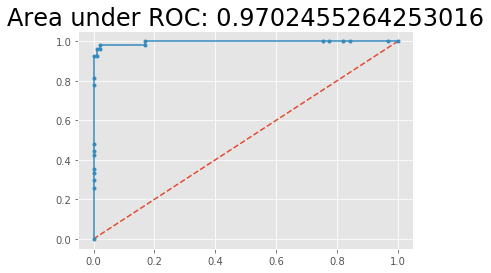

In [120]:
#AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb_predictions)
fpr, tpr, thresholds = roc_curve(y_test, GBBoost.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(gb_roc_auc), fontdict={"size":24})
plt.show()

# Randomized Search Boosting

In [123]:
from sklearn.model_selection import RandomizedSearchCV
GB = GradientBoostingClassifier()
#Cross-validation will be used to tune the other model parameters
param_dist = {"n_estimators": range(1,200,10),
              "learning_rate": [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              "max_depth": range(1,30,5),
              "max_features": range(1,3,1),
              "criterion": ["friedman_mse","mse","mae"],
              "min_samples_leaf": [0.1, 0.2, 0.3, 0.4, 0.5],
              "min_samples_split": [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]}
#Incorporating cross-validation, with 10 folds, using recall as the primary indicator of model performance. 
boost_cv = RandomizedSearchCV(GB, param_distributions = param_dist, cv = 10, scoring='recall', verbose=1)

boost_cv.fit(X_train, y_train)
#97% accuracy achieved with "importance" of predictors
boost_cv.score(X_test, y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


0.9444444444444444

In [124]:
boost_cv

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': range(1, 200, 10), 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'max_depth': range(1, 30, 5), 'max_features': range(1, 3), 'criterion': ['friedman_mse', 'mse', 'mae'], 'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5], 'min_samples_split': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='recall', verbose=1)

In [125]:
boost_pred = boost_cv.predict(X_test)
# Model diagnostics
print(confusion_matrix(y_test,boost_pred))  
print(classification_report(y_test,boost_pred))
print(accuracy_score(y_test,boost_pred))

[[89  0]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.94      0.97        54

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791


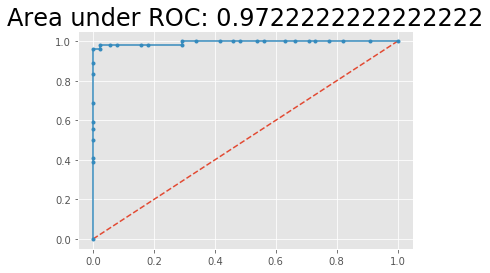

In [126]:
#AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, boost_pred)
fpr, tpr, thresholds = roc_curve(y_test, boost_cv.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("Area under ROC: {}".format(gb_roc_auc), fontdict={"size":24})
plt.show()

Compared to our individually-tuned model, randomizedsearch found max_depth to be shallower at 3, min_samples_leaf to be larger at 1, and split to be 1.0, learninng_rate to be 1. The model performed slightly better overall as seen in AUC comparison; however, it performed overall worse on recall, which is problematic. The reason for this is that even if randomizedsearch is set to optimizing recall, it optimzes the average whereas we cant to optimize the recall for diagnosis of 1          

## XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

X, y = data_concat[["concave points_worst",
                     "area_se",
                    "texture_worst"]],\
data_concat["diagnosis"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()